In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [21]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)


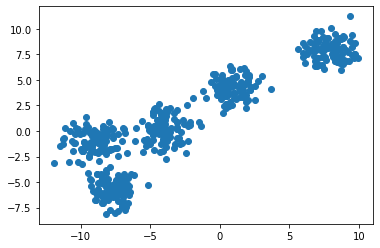

In [22]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [23]:
k=5
color=["green","red","blue","yellow","orange"]
clusters={}
for i in range(k):
    center=10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    
    cluster={
        'center':center,
        'points':points,
        'color': color[i]
        }
    clusters[i]=cluster

In [24]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [25]:
def assign(clusters): # E-Step
    for ix in range(X.shape[0]):
        dist=[]
        curr_x=X[ix]
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step 
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0: 
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]   
            
def plotClusters(clusters): 
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")            

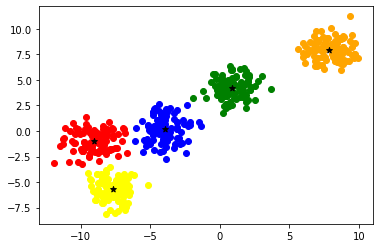

In [32]:
# Repeat this cell few times or put it inside a loop
assign(clusters)
plotClusters(clusters)
updateClusters(clusters)